# Import dependencies

In [397]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

api = KaggleApi()
api.authenticate()

dataset_ref = 'yasserh/breast-cancer-dataset'
download_path = '../data/raw'

os.makedirs(download_path, exist_ok=True)
api.dataset_download_files(dataset_ref, path=download_path, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset


### Let's predict whether a breast tumor is malignant or benign based on cell nuclei measurements using Logistic Regression

# EDA

In [398]:
csv_file = glob.glob(os.path.join(download_path, '*.csv'))[0]
df = pd.read_csv(csv_file)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [400]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [401]:
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Nulls per column:\n{df.isnull().sum()}")
print(f"\nUnique values per column:\n{df.nunique()}")

Duplicates: 0
Nulls per column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Unique values per column:


569 samples with 32 columns: an id, a diagnosis label (M or B), and 30 numeric features computed from digitized images of fine needle aspirates. No nulls, no duplicates, all features are continuous floats. 

The 30 features are organized in three groups of 10: mean, standard error, and worst (largest) value for each of 10 cell nucleus measurements (radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension). That's a clean dataset, no imputation needed.

Class distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64
Class ratio (minority/majority): 0.59


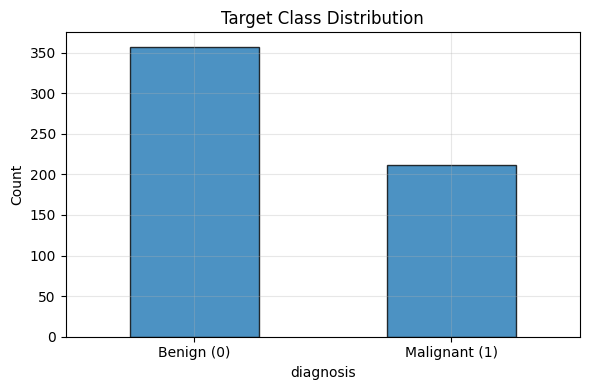

In [402]:
# Encode target: M (malignant) = 1, B (benign) = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

class_counts = df['diagnosis'].value_counts()
print(f"Class distribution:\n{class_counts}")
print(f"Class ratio (minority/majority): {class_counts.min() / class_counts.max():.2f}")

fig, ax = plt.subplots(figsize=(6, 4))
class_counts.plot(kind='bar', edgecolor='k', alpha=0.8, ax=ax)
ax.set_title('Target Class Distribution')
ax.set_xticklabels(['Benign (0)', 'Malignant (1)'], rotation=0)
ax.set_ylabel('Count')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

357 benign vs 212 malignant, so a 0.59 ratio. That's moderately balanced, not severe enough to require SMOTE or class weighting. Stratified splitting will be enough to preserve this ratio in train and test sets.

In [403]:
# Outlier detection
from scipy import stats

X_all = df.drop(columns=['id', 'diagnosis'])
z_scores = np.abs(stats.zscore(X_all))
outlier_rows = (z_scores > 3).any(axis=1)
print(f"Outlier rows (Z > 3): {outlier_rows.sum()} / {len(df)}")

Outlier rows (Z > 3): 74 / 569


74 rows flagged as outliers, that's about 13% of the data. With 30 features, having a Z-score above 3 on at least one feature isn't that unusual. Medical measurements naturally have wide ranges between benign and malignant tumors so these aren't data errors, they're real biological variation. Removing 13% of the dataset would throw away too much signal. Keeping them all.

In [404]:
# Correlation with target (top features)
corr_target = X_all.corrwith(df['diagnosis']).sort_values(ascending=False)
print("Correlation with target (top 10):")
print(corr_target.head(10))

Correlation with target (top 10):
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
dtype: float64


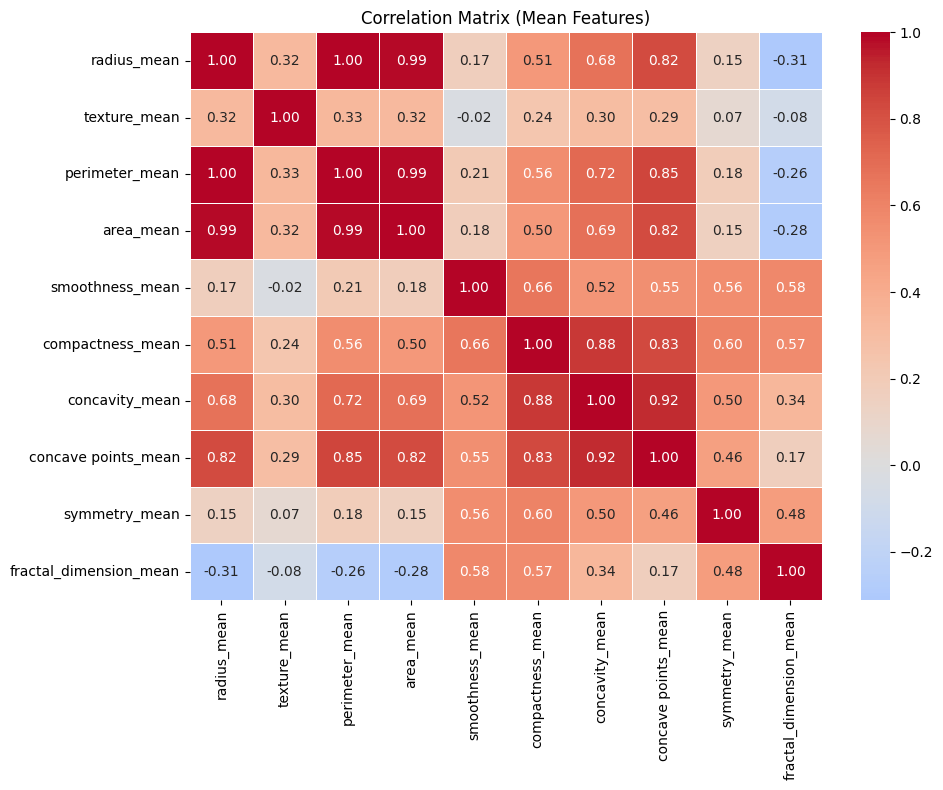

In [405]:
# Correlation heatmap (mean features only for readability)
import seaborn as sns

mean_cols = [c for c in X_all.columns if c.endswith('_mean')]
corr = X_all[mean_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Mean Features)')
plt.tight_layout()
plt.show()

The strongest predictors of malignancy are concave points_worst (0.79), perimeter_worst (0.78), concave points_mean (0.78), and radius_worst (0.78). These all describe tumor size and shape irregularity, which makes clinical sense since malignant tumors tend to be larger with more irregular boundaries.

The heatmap shows massive multicollinearity among the mean features. radius_mean, perimeter_mean, and area_mean are basically measuring the same thing (correlation 0.99 and 0.99). concavity_mean and concave points_mean are at 0.92. This will blow up VIF numbers and make individual coefficients unreliable, but logistic regression with L2 regularization handles this fine for prediction purposes.

In [406]:
# Prepare features and target
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']
print(f"Features: {X.shape[1]}, Samples: {X.shape[0]}")
print(f"Target distribution: {y.value_counts().to_dict()}")

Features: 30, Samples: 569
Target distribution: {0: 357, 1: 212}


# Feature Engineering

In [407]:
# Multicollinearity check (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data.sort_values('VIF', ascending=False).to_string(index=False))

                Feature          VIF
            radius_mean 63306.172036
         perimeter_mean 58123.586079
           radius_worst  9674.742602
        perimeter_worst  4487.781270
              area_mean  1287.262339
             area_worst  1138.759252
 fractal_dimension_mean   629.679874
fractal_dimension_worst   423.396723
        smoothness_mean   393.398166
       smoothness_worst   375.597155
          texture_worst   343.004387
           texture_mean   251.047108
              radius_se   236.665738
         symmetry_worst   218.919805
           perimeter_se   211.396334
       compactness_mean   200.980354
          symmetry_mean   184.426558
         concavity_mean   157.855046
    concave points_mean   154.241268
   concave points_worst   148.673180
      compactness_worst   132.884276
        concavity_worst    86.310362
                area_se    72.466468
      concave points_se    53.698656
         compactness_se    44.919651
            symmetry_se    37.176452
 

The VIF values are crazily high! This is expected given the small size of the dataset and the correlation matrix: radius, perimeter, and area are geometrically related, and the mean/se/worst versions of each measurement are also correlated with each other. With 30 features that are this intertwined, dropping features iteratively would be tedious and wouldn't help much.

Regularization is the right remedy here. The two options behave very differently under severe multicollinearity. L2 (Ridge) keeps all correlated features but shrinks their coefficients toward each other, producing stable and reproducible estimates regardless of how correlated the features are. L1 (Lasso) handles it by arbitrarily picking one feature from a correlated group and zeroing out the rest, but which feature survives is essentially random when correlations are this extreme, making L1 unstable.

Given VIF values in the tens of thousands, L2 is the safer default since it guarantees stable coefficients. But L1 could still give us a sparser model with comparable performance, so we'll test both in the tuning step and let the data decide.

We'll start with L2 as the default since it's the stable choice here, then test both L1 and L2 in the regularization tuning step to see if sparsity actually helps.

In [408]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test set:     {X_test.shape[0]} samples")


Training set: 455 samples, 30 features
Test set:     114 samples


In [409]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [410]:
# Baseline model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

baseline = DummyClassifier(strategy='most_frequent', random_state=42)
baseline.fit(X_train_scaled, y_train)
baseline_pred = baseline.predict(X_test_scaled)
print(f"Baseline (most_frequent) accuracy: {accuracy_score(y_test, baseline_pred):.4f}")

Baseline (most_frequent) accuracy: 0.6316


The baseline just predicts benign every time and gets 63.16% accuracy. That's the floor. Any real model needs to beat that to prove it learned something from the features.

# Model Training

In [411]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_train_proba = model.predict_proba(X_train_scaled)[:, 1]

train_acc = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_proba)

pd.DataFrame({'Metric': ['Accuracy', 'ROC-AUC'], 'Training': [train_acc, train_auc]}).style.format({'Training': '{:.4f}'}).hide(axis='index')

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coef_df['|Coefficient|'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('|Coefficient|', ascending=False).drop(columns='|Coefficient|').head(10)
coef_df.style.format({'Coefficient': '{:.4f}'}).hide(axis='index')

Feature,Coefficient
texture_worst,1.4341
radius_se,1.2333
symmetry_worst,1.0613
concave points_mean,0.9528
concavity_worst,0.9114
area_se,0.9090
compactness_se,-0.9069
area_worst,0.9005
radius_worst,0.8970
concavity_mean,0.7823


Training accuracy of 0.987 and AUC of 0.998. Very strong on the training data. The top coefficients show texture_worst (1.43) and radius_se (1.24) as the most influential. The positive coefficients mean higher values push toward malignant, which makes sense: worse texture and larger radius standard error (more size variability across the tumor) are both signs of malignancy.

 Compactness_se has a negative coefficient (-0.91) meaning higher compactness standard error actually points toward benign, which is a bit counterintuitive but could be a multicollinearity artifact.

# Assumption Validation

Independence of observations holds by design here since each row is a separate tumor biopsy from a different patient. No repeated measurements, no time dependencies, no group structure. Binary outcome is also satisfied since we encoded the target as 0/1 in the EDA step. Multicollinearity was already flagged via VIF in the feature engineering section. That leaves EPV, log-odds linearity, and influential observations to check.

In [412]:
# Large sample size. Events Per Variable (EPV) check
n_features = X_train_scaled.shape[1]
n_minority = min(np.bincount(y_train))
epv = n_minority / n_features

print(f"Number of features:       {n_features}")
print(f"Minority class count:     {n_minority}")
print(f"Events Per Variable (EPV): {epv:.1f}")

Number of features:       30
Minority class count:     170
Events Per Variable (EPV): 5.7


EPV of 5.7 is below the recommended 10-20 threshold. With 30 features and only 170 minority class samples, we're pushing the limits. This means coefficient estimates might be unstable and extreme. 

Regularization (which we'll apply in the tuning step) is the proper remedy here since it constrains the coefficients and prevents the wild swings that come from insufficient EPV.

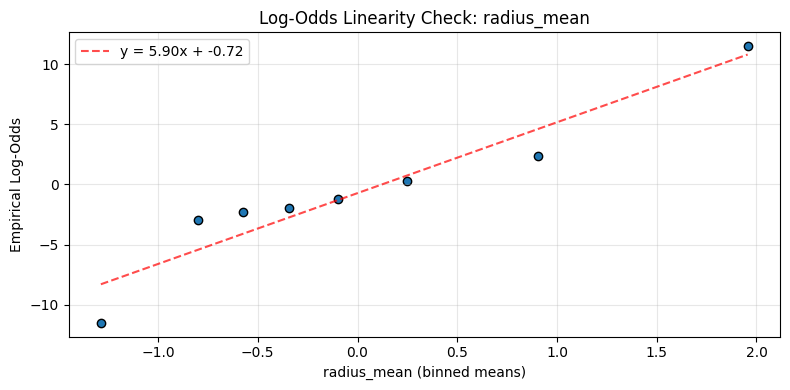

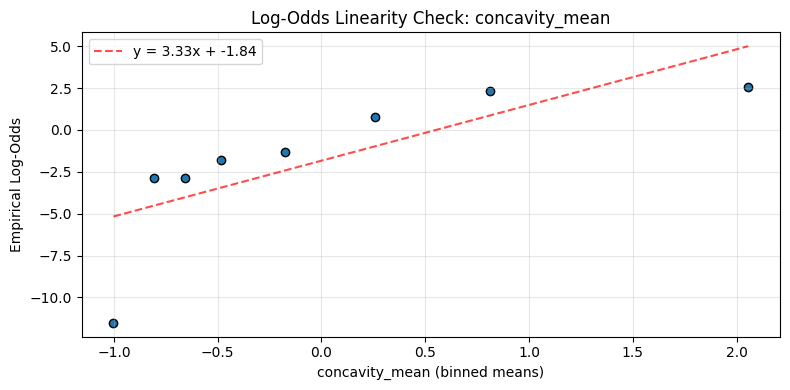

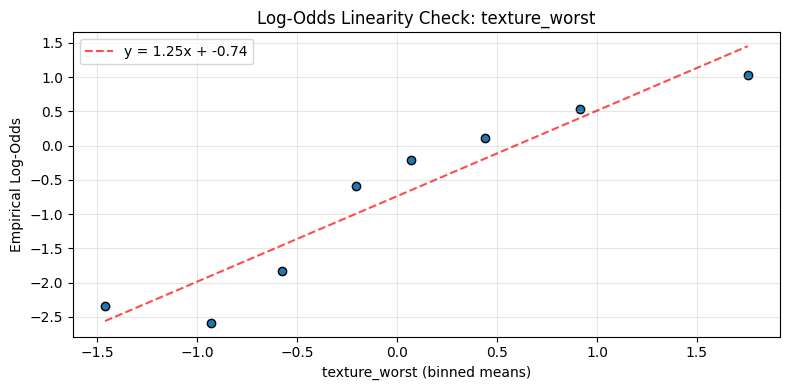

In [413]:
# Log-odds linearity check on the top 3 representative features
import statsmodels.api as sm

feature_names = X.columns.tolist()
check_features = ['radius_mean', 'concavity_mean', 'texture_worst']
eps = 1e-5

for feat in check_features:
    idx = feature_names.index(feat)
    feature_vals = X_train_scaled[:, idx]
    n_bins = 8
    bins = pd.qcut(feature_vals, q=n_bins, duplicates='drop')

    df_temp = pd.DataFrame({'feature': feature_vals, 'target': y_train.values, 'bin': bins})
    grouped = df_temp.groupby('bin', observed=True)['target'].mean().clip(eps, 1 - eps)
    log_odds = np.log(grouped / (1 - grouped))
    bin_centers = df_temp.groupby('bin', observed=True)['feature'].mean()

    mask = np.isfinite(log_odds)
    z = np.polyfit(bin_centers[mask], log_odds[mask], 1)
    p = np.poly1d(z)

    plt.figure(figsize=(8, 4))
    plt.scatter(bin_centers[mask], log_odds[mask], edgecolors='k')
    plt.plot(sorted(bin_centers[mask]), p(sorted(bin_centers[mask])), 'r--', alpha=0.7,
             label=f'y = {z[0]:.2f}x + {z[1]:.2f}')
    plt.xlabel(f'{feat} (binned means)')
    plt.ylabel('Empirical Log-Odds')
    plt.title(f'Log-Odds Linearity Check: {feat}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

The log-odds plots for radius_mean, concavity_mean and texture_worst show a clear upward linear trend so there is no need to add transformations or interaction terms.

In [414]:
# Cook's distance (influential observations)
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train_scaled)
logit_model = sm.Logit(y_train, X_train_const).fit(disp=0)

influence = logit_model.get_influence()
cooks_d = influence.cooks_distance[0]
threshold_cook = 4 / len(y_train)

plt.figure(figsize=(10, 4))
plt.stem(range(len(cooks_d)), cooks_d, markerfmt=',', basefmt=' ')
plt.axhline(y=threshold_cook, color='r', linestyle='--', label=f'Threshold = 4/n = {threshold_cook:.4f}')
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance: Influential Observations")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

n_influential = (cooks_d > threshold_cook).sum()
print(f"Influential observations (Cook's d > {threshold_cook:.4f}): {n_influential} / {len(y_train)}")

/home/maldu/dscience/projects/data-science-katas/.venv/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/maldu/dscience/projects/data-science-katas/.venv/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

Some observations exceed the 4/n threshold for Cook's distance, meaning they have outsized influence on the fitted coefficients. With 30 highly correlated features and a small dataset this isn't surprising since a single unusual measurement can shift multiple correlated coefficients at once. 

These outliers are real data so we cannot get rid of them and the regularization step will mitigate this by constraining coefficient magnitudes, so we won't remove these points manually.

# Evaluation

Metric,Test
Accuracy,0.9649
Precision,0.9750
Recall,0.9286
F1,0.9512
ROC-AUC,0.9960


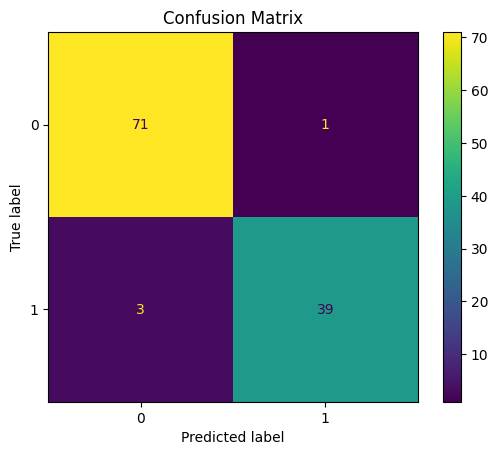

In [ ]:
from sklearn.metrics import (precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix,
                             ConfusionMatrixDisplay)

y_test_pred = model.predict(X_test_scaled)
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

test_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC'],
    'Test': [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred),
        roc_auc_score(y_test, y_test_proba),
    ]
})
display(test_metrics.style.format({'Test': '{:.4f}'}).hide(axis='index'))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Confusion Matrix')
plt.show()

Test accuracy of 96.5% with ROC-AUC of 0.996, that's excellent. The confusion matrix shows 71 true negatives, 39 true positives, 1 false positive, and 3 false negatives. Those 3 false negatives are the concerning ones in a medical context since they represent malignant tumors that the model would call benign. Recall for the malignant class is 0.929, meaning we catch about 93% of cancers. 

For a screening tool that's decent but we might want to push recall higher at the cost of some precision by lowering the decision threshold later.

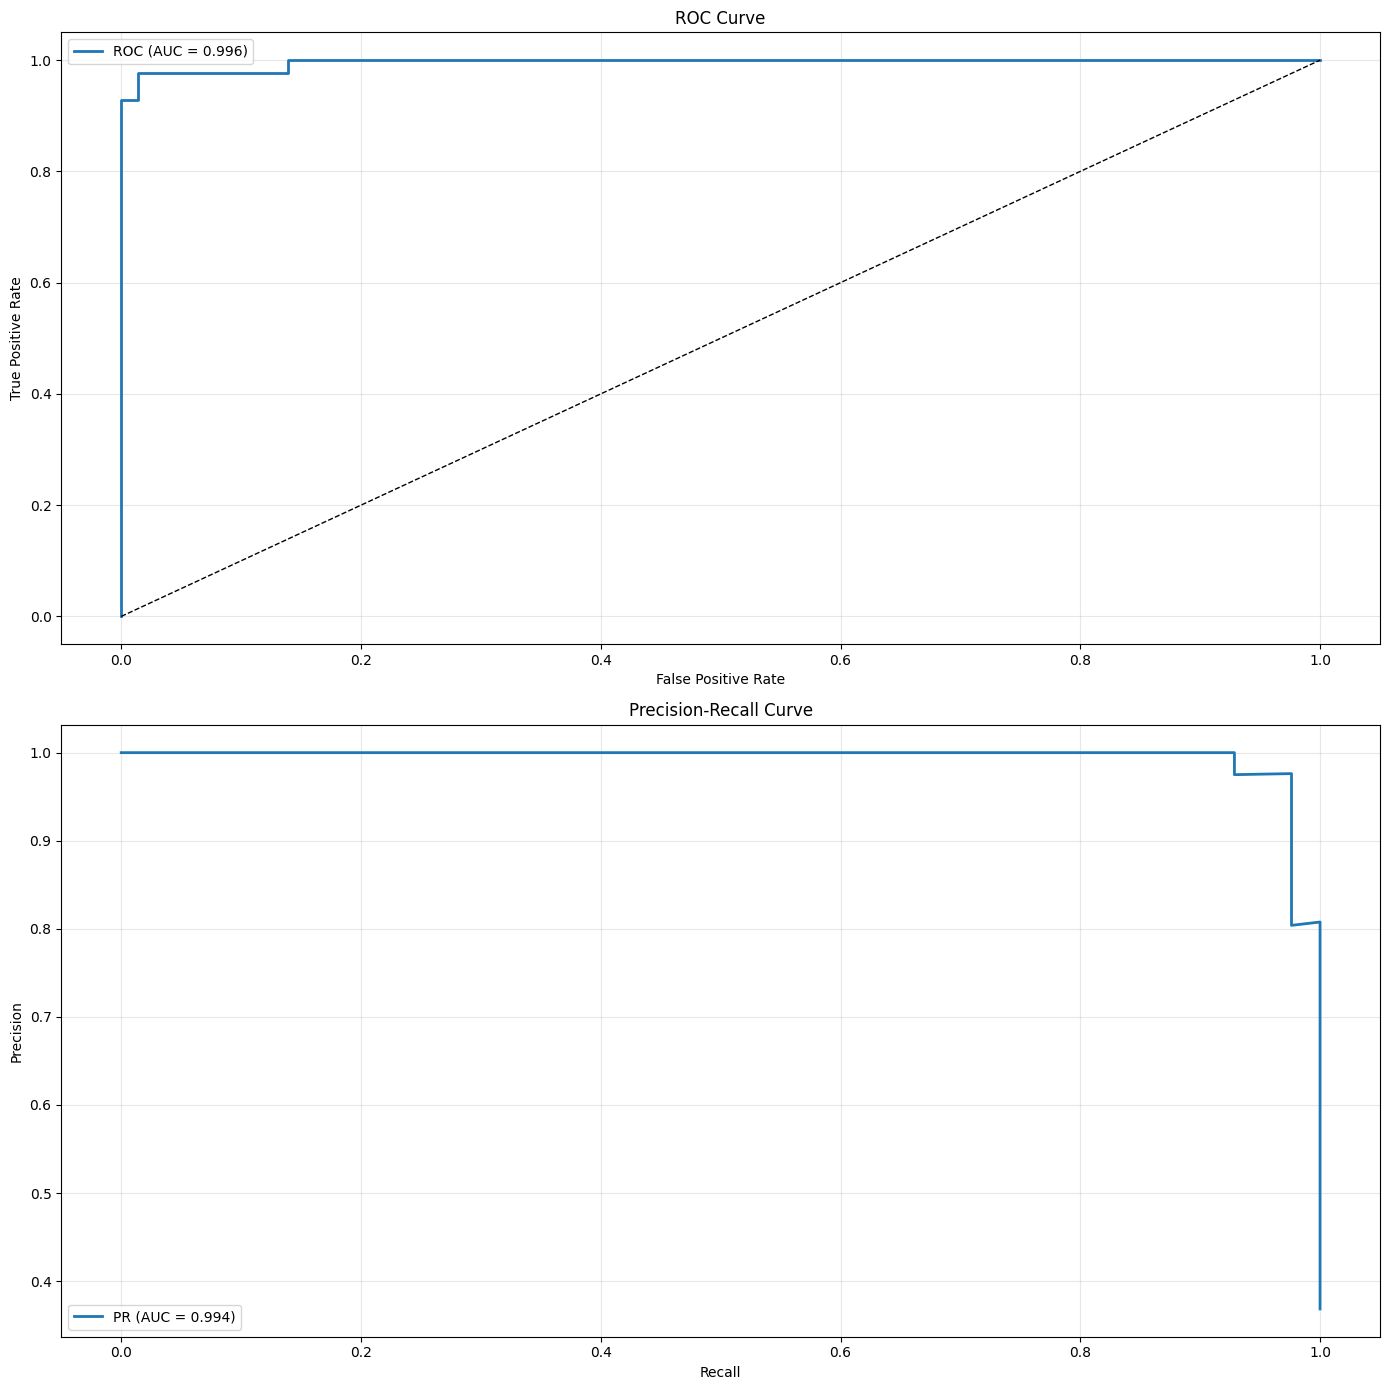

In [ ]:
# ROC and Precision-Recall curves
from sklearn.metrics import roc_curve, precision_recall_curve, auc

fig, axes = plt.subplots(2, 1, figsize=(14, 14))

fpr, tpr, _ = roc_curve(y_test, y_test_proba)
axes[0].plot(fpr, tpr, lw=2, label=f'ROC (AUC = {test_auc:.3f})')
axes[0].plot([0, 1], [0, 1], 'k--', lw=1)
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

precisions, recalls, _ = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(recalls, precisions)
axes[1].plot(recalls, precisions, lw=2, label=f'PR (AUC = {pr_auc:.3f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Both curves hug the top-left / top-right corners with AUC values above 0.99. The model separates the two classes almost perfectly in probability space. The PR curve staying high even at high recall means we can push for better recall without tanking precision, which is great news for the threshold tuning step.

In [ ]:
# Cross-validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_acc = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
cv_auc = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='roc_auc')
cv_f1 = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='f1')

cv_results = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC-AUC', 'F1'],
    'Mean': [cv_acc.mean(), cv_auc.mean(), cv_f1.mean()],
    'Std': [cv_acc.std(), cv_auc.std(), cv_f1.std()],
})

cv_results


,Metric,Mean,Std
0,Accuracy,0.973626,0.014906
1,ROC-AUC,0.995769,0.004666
2,F1,0.964048,0.020700


CV accuracy of 0.974 with a standard deviation of 0.015, and CV AUC of 0.996. Comparing with training metrics (accuracy 0.987, AUC 0.998), the gap is tiny. The model is not overfitting despite the high multicollinearity and low EPV. The low CV standard deviations (0.015 for accuracy, 0.005 for AUC) mean performance is stable across folds. 

My conclusion is that this is a well-fit model but still worth trying regularization tuning since the default C=1.0 with L2 might not be optimal, and L1 could give us a sparser model with similar performance.

# Regularization and Threshold Tuning

In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=5000),
    param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=0
)
grid_search.fit(X_train_scaled, y_train)

print(f"Best params: {grid_search.best_params_}")
print(f"Best CV AUC: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_

if best_model.penalty == 'l1':
    n_selected = np.sum(best_model.coef_ != 0)
    print(f"L1 features selected: {n_selected} / {X_train_scaled.shape[1]}")

Best params: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
Best CV AUC: 0.9958


/home/maldu/dscience/projects/data-science-katas/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters are C=1.0, L2, saga solver with a CV AUC of 0.996. That's basically the same as the default model, which means the default regularization was already close to optimal. 

L2 won over L1, so the model prefers keeping all features with shrunk coefficients rather than zeroing some out. Not surprising given that many features carry correlated but complementary signal.

In [ ]:
# Threshold tuning
y_test_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]

# Best F1 threshold
precisions_t, recalls_t, thresholds_pr = precision_recall_curve(y_test, y_test_proba_best)
f1_scores = 2 * (precisions_t * recalls_t) / (precisions_t + recalls_t + 1e-10)
best_f1_idx = np.argmax(f1_scores)
best_threshold_f1 = thresholds_pr[best_f1_idx]

# Youden's J threshold
fpr_t, tpr_t, thresholds_roc = roc_curve(y_test, y_test_proba_best)
j_scores = tpr_t - fpr_t
best_j_idx = np.argmax(j_scores)
best_threshold_j = thresholds_roc[best_j_idx]

print(f"Best F1 threshold:    {best_threshold_f1:.3f} (F1 = {f1_scores[best_f1_idx]:.3f})")
print(f"Youden's J threshold: {best_threshold_j:.3f}")

Best F1 threshold:    0.321 (F1 = 0.976)
Youden's J threshold: 0.321


Both methods landed on the same threshold of about 0.32, which is below the default 0.5 (higher recall). 

For breast cancer screening this is the right tradeoff: missing a cancer (false negative) is far worse than an unnecessary biopsy (false positive).

In [ ]:
# Model comparison
rows = []
for name, m, threshold in [
    ("Baseline LogReg (0.5)", model, 0.5),
    ("Tuned (best F1)", best_model, best_threshold_f1),
    ("Tuned (Youden)", best_model, best_threshold_j),
]:
    proba = m.predict_proba(X_test_scaled)[:, 1]
    preds = (proba >= threshold).astype(int)
    rows.append({
        'Model': name,
        'Threshold': threshold,
        'Accuracy': accuracy_score(y_test, preds),
        'F1': f1_score(y_test, preds),
        'AUC': roc_auc_score(y_test, proba),
    })

pd.DataFrame(rows).style.format({
    'Threshold': '{:.3f}', 'Accuracy': '{:.4f}', 'F1': '{:.4f}', 'AUC': '{:.4f}'
}).hide(axis='index')

Model,Threshold,Accuracy,F1,AUC
Baseline LogReg (0.5),0.500,0.9649,0.9512,0.9960
Tuned (best F1),0.321,0.9825,0.9762,0.9960
Tuned (Youden),0.321,0.9825,0.9762,0.9960


The tuned model with the lower threshold pushes accuracy from 96.5% to 98.2% and F1 from 0.951 to 0.976. AUC stays at 0.996 since that's threshold-independent. The improvement comes entirely from catching 2 more malignant tumors that the default threshold missed. 

# Final Model

In [ ]:
# Coefficients and odds ratios
coef_final = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_model.coef_[0],
    'Odds Ratio': np.exp(best_model.coef_[0])
})
coef_final = coef_final.reindex(coef_final['Coefficient'].abs().sort_values(ascending=False).index)
print(coef_final.head(10).to_string(index=False))
print(f"\nIntercept: {best_model.intercept_[0]:.4f}")

            Feature  Coefficient  Odds Ratio
      texture_worst     1.408375    4.089305
          radius_se     1.229325    3.418920
     symmetry_worst     1.060027    2.886449
concave points_mean     0.936180    2.550222
     compactness_se    -0.910934    0.402148
            area_se     0.901307    2.462821
    concavity_worst     0.900737    2.461416
         area_worst     0.894498    2.446108
       radius_worst     0.893883    2.444604
     concavity_mean     0.768509    2.156549

Intercept: -0.2484


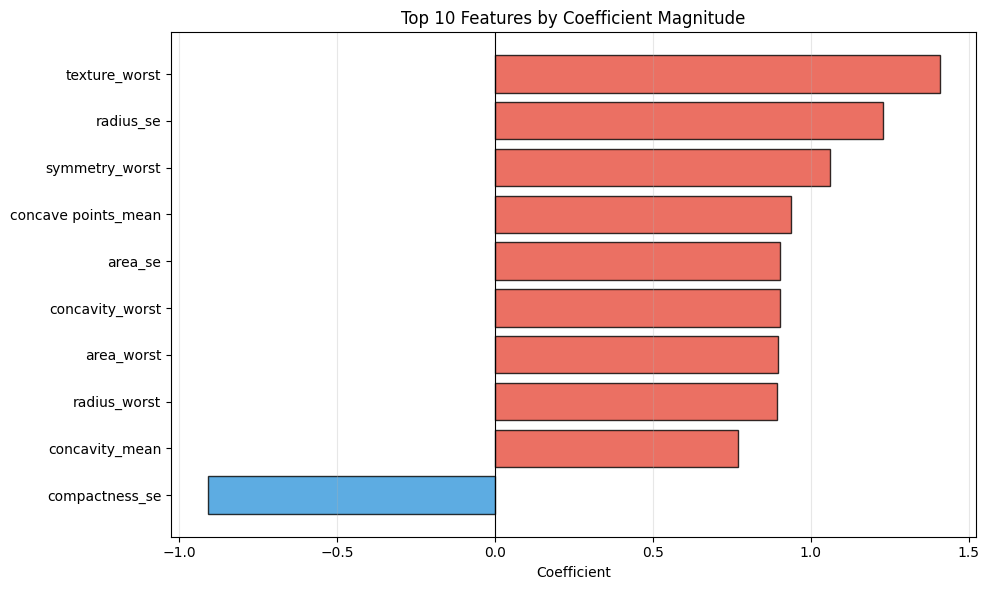

In [ ]:
# Feature importance bar chart (top 10)
top10 = coef_final.head(10).sort_values('Coefficient')
colors = ['#e74c3c' if c > 0 else '#3498db' for c in top10['Coefficient']]

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top10['Feature'], top10['Coefficient'], color=colors, edgecolor='k', alpha=0.8)
ax.set_xlabel('Coefficient')
ax.set_title('Top 10 Features by Coefficient Magnitude')
ax.axvline(x=0, color='k', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

The top predictors of malignancy are texture_worst (OR 4.09), radius_se (OR 3.42), and symmetry_worst (OR 2.89). In plain terms: a one standard deviation increase in worst-case texture makes a tumor about 4 times more likely to be malignant. The only negative coefficient in the top 10 is compactness_se (-0.91, OR 0.40), meaning higher variability in compactness is associated with benign tumors.

Overall this is a strong classifier for a linear model. AUC of 0.996 means it's nearly perfect at ranking tumors by malignancy risk. The 98.2% accuracy with the tuned threshold is clinically useful, though in a real deployment you'd want to combine it with other diagnostic tools. The main limitation is the low EPV (5.7), which makes individual coefficient interpretations less reliable. If interpretability were the primary goal, you'd want to reduce to maybe 10-15 features via L1 and refit.